## Real-Time Stock Price Prediction Using Machine Learning

## Use minute-level data to predict the stock price trend of five companies on a certain day
## 1. Apple
## 2. Google
## 3. Microsoft
## 4. Nvidia
## 5. Tesla

## Install yfinance

In [1]:
!pip install yfinance

## Choose Apple as the experimental subjects.

In [2]:
import yfinance as yf

# Creating a Ticker Object
apple = yf.Ticker("NVDA")

# Get minute-level data for the last 7 days
df = apple.history(period='5d', interval='1m')

# View the previous five rows of data
print(df.head())


                                Open       High        Low      Close  \
Datetime                                                                
2025-04-22 09:30:00-04:00  98.764999  98.889900  98.070000  98.110001   
2025-04-22 09:31:00-04:00  98.110001  98.360001  97.970001  98.275002   
2025-04-22 09:32:00-04:00  98.290001  98.330002  97.724998  98.160004   
2025-04-22 09:33:00-04:00  98.156799  98.160004  97.449997  97.720001   
2025-04-22 09:34:00-04:00  97.720001  97.829903  97.360001  97.529999   

                             Volume  Dividends  Stock Splits  
Datetime                                                      
2025-04-22 09:30:00-04:00  11723267        0.0           0.0  
2025-04-22 09:31:00-04:00   1702779        0.0           0.0  
2025-04-22 09:32:00-04:00   1736589        0.0           0.0  
2025-04-22 09:33:00-04:00   1441330        0.0           0.0  
2025-04-22 09:34:00-04:00   1165804        0.0           0.0  


In [3]:
df.shape

(1934, 7)

In [4]:
df.to_csv("NVDA_last_5days.csv")

## save the raw csv file

In [14]:
import yfinance as yf

# Creating a Ticker Object
ticker = yf.Ticker("AAPL")

# Get the data for the last 5 days
df = ticker.history(period="5d",interval="1m")

# save to the csv file
df.to_csv("AAPL_last_5days.csv")

print("Data saved as AAPL_last_5days.csv")


数据已保存为 AAPL_last_5days.csv


# features/indicators Description
## lag1 feature: The closing price 1 minute ago, so that the model knows the recent price changes
## lag5 feature: The closing price 5 minutes ago to understand short-term fluctuations
## rolling_mean_5: The average price in the last 5 minutes is a smoothing trend.
## rolling_std_5: The price fluctuation range in the last 5 minutes. Large fluctuations may indicate a trend change.
# ---------------------------------------------------------------------------
# Reasons for adding these new features:
## Because stock prices are time series data, current price changes depend largely on the trend over the past period of time.

## The lag feature helps the model remember the most recent actual price

## The rolling feature provides a reference for **short-term trends (means) and short-term risks (volatility)**

## In this way, the model can not only look at the current situation, but also consider the trends and activity over a short period of time in the past, and the prediction effect will be more in line with the actual situation.

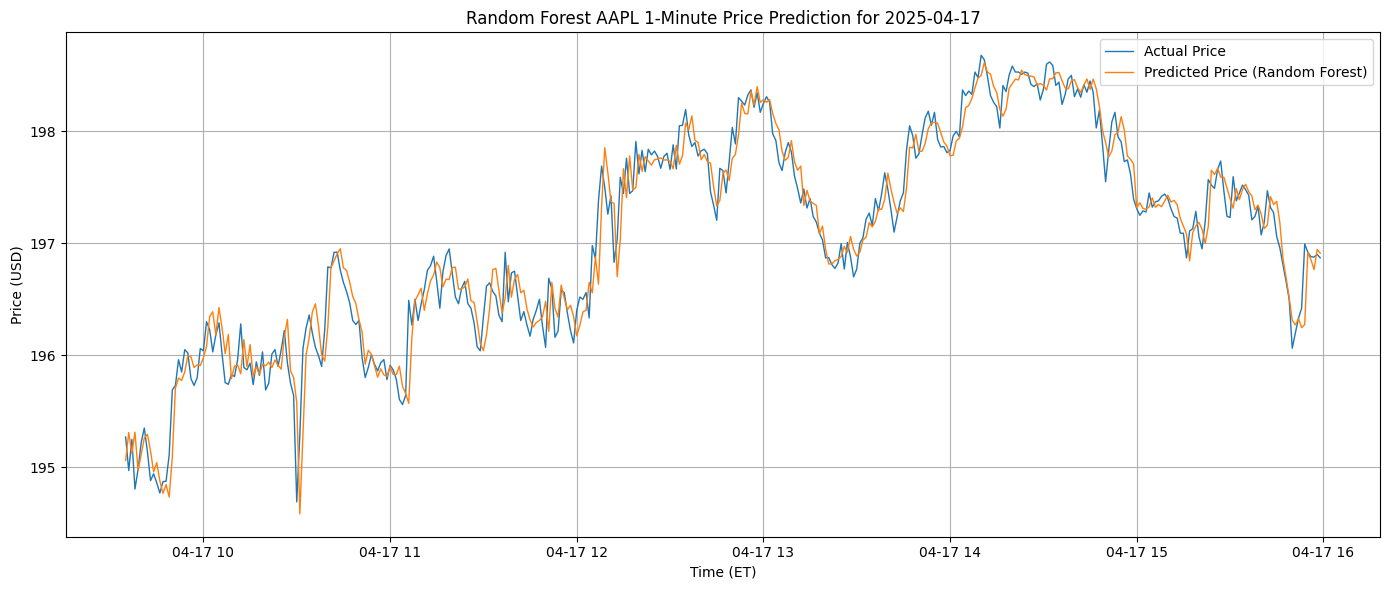

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Read uploaded CSV data
df = pd.read_csv("AAPL_last_5days.csv", index_col=0, parse_dates=True)

# Retain trading time period (09:30 ~ 16:00)
df = df.between_time("09:30", "16:00")

# Extract the last trading day
last_date = df.index.date[-1]

# Split training set and test set
train_df = df[df.index.date < last_date].copy()
test_df = df[df.index.date == last_date].copy()

# Constructing characteristic functions
def add_features(data):
    data['lag_1'] = data['Close'].shift(1)
    data['lag_5'] = data['Close'].shift(5)
    data['rolling_mean_5'] = data['Close'].rolling(window=5).mean()
    data['rolling_std_5'] = data['Close'].rolling(window=5).std()
    return data.dropna()

# Add Features
train_df = add_features(train_df)
test_df = add_features(test_df)

# Features and goals
features = ['lag_1', 'lag_5', 'rolling_mean_5', 'rolling_std_5']
X_train = train_df[features]
y_train = train_df['Close']
X_test = test_df[features]
y_test = test_df['Close']
time_test = test_df.index

# train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# model prediction
y_pred = model.predict(X_test)

# visualisation
plt.figure(figsize=(14, 6))
plt.plot(time_test, y_test, label='Actual Price', linewidth=1)
plt.plot(time_test, y_pred, label='Predicted Price (Random Forest)', linewidth=1)
plt.title(f'Random Forest AAPL 1-Minute Price Prediction for {last_date}')
plt.xlabel('Time (ET)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.16
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21
R-squared (R2) Score: 0.95


In [1]:
!pip install plotly


In [4]:
import plotly.graph_objs as go

# Build the chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_test, y=y_test, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=time_test, y=y_pred, mode='lines', name='Predicted Price'))

# Chart layout
fig.update_layout(
    title='AAPL 1-Minute Price Prediction (Interactive)',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

# show the interactive figure
fig.show()


In [5]:
fig.write_html("AAPL_interactive_forecast.html")
from google.colab import files
files.download("AAPL_interactive_forecast.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
from xgboost import XGBRegressor

# Training a lightweight XGBoost model
model = XGBRegressor(
    n_estimators=30,
    max_depth=3,
    learning_rate=0.1,
    tree_method='hist',
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Use Plotly for interactive chart presentation
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_test, y=y_test, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=time_test, y=y_pred, mode='lines', name='Predicted Price (XGBoost)'))

fig.update_layout(
    title=f'AAPL 1-Minute Stock Price Prediction for {last_date} (XGBoost)',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

# Show Chart
fig.show()


In [ ]:
# Export to HTML file
fig.write_html("AAPL_xgboost_interactive_forecast.html")
files.download("AAPL_xgboost_interactive_forecast.html")

## Use ta library to computer the RSI Indicator

In [5]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=1dcb6ed718d83c607b3210f4a6106d6094915be37870f5de422bfe4fb71bffff
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


## Add RSI and Volume Indicators(Complicated Version)

In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ta.momentum import RSIIndicator

# read the data
df = pd.read_csv("AAPL_last_5days.csv", index_col=0, parse_dates=True)
df = df.between_time("09:30", "16:00")

# Split training and test sets
last_date = df.index.date[-1]
train_df = df[df.index.date < last_date].copy()
test_df = df[df.index.date == last_date].copy()

# Added hysteresis feature, rolling feature and RSI (using ta library)
def add_features(data):
    data['lag_1'] = data['Close'].shift(1)
    data['lag_5'] = data['Close'].shift(5)
    data['rolling_mean_5'] = data['Close'].rolling(5).mean()
    data['rolling_std_5'] = data['Close'].rolling(5).std()
    data['rsi_14'] = RSIIndicator(close=data['Close'], window=14).rsi()
    return data.dropna()

train_df = add_features(train_df)
test_df = add_features(test_df)

# set the features
features = ['lag_1', 'lag_5', 'rolling_mean_5', 'rolling_std_5', 'rsi_14', 'Volume']
X_train = train_df[features]
y_train = train_df['Close']
X_test = test_df[features]
y_test = test_df['Close']

# XGBoost model structure
model = XGBRegressor(
    n_estimators=30,
    max_depth=3,
    learning_rate=0.1,
    tree_method='hist',
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Use Plotly for interactive chart presentation
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_test, y=y_test, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=time_test, y=y_pred, mode='lines', name='Predicted Price (XGBoost)'))

fig.update_layout(
    title=f'AAPL 1-Minute Stock Price Prediction for {last_date} (XGBoost)',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

# show interactive chart
fig.show()


In [9]:
# compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R-squared (R2) Score: 0.92


In [12]:
fig.write_html("AAPL_interactive_forecast-XGBoost.html")
from google.colab import files
# files.download("AAPL_interactive_forecast--XGBoost.html")

FileNotFoundError: Cannot find file: AAPL_interactive_forecast--XGBoost.html

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ta.momentum import RSIIndicator
import plotly.graph_objs as go

# read the data
df = pd.read_csv("AAPL_last_5days.csv", index_col=0, parse_dates=True)
df = df.between_time("09:30", "16:00")

# split training set and testing set
last_date = df.index.date[-1]
train_df = df[df.index.date < last_date].copy()
test_df = df[df.index.date == last_date].copy()

# add features（lag, rolling, RSI）
def add_features(data):
    data['lag_1'] = data['Close'].shift(1)
    data['lag_5'] = data['Close'].shift(5)
    data['rolling_mean_5'] = data['Close'].rolling(5).mean()
    data['rolling_std_5'] = data['Close'].rolling(5).std()
    data['rsi_14'] = RSIIndicator(close=data['Close'], window=14).rsi()
    return data.dropna()

train_df = add_features(train_df)
test_df = add_features(test_df)

features = ['lag_1', 'lag_5', 'rolling_mean_5', 'rolling_std_5', 'rsi_14', 'Volume']
X_train = train_df[features]
y_train = train_df['Close']
X_test = test_df[features]
y_test = test_df['Close']
# time_test = test_df.index  # for plotting

# random forest model
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Interactive charts
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_test, y=y_test, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=time_test, y=y_pred, mode='lines', name='Predicted Price (Random Forest)'))

fig.update_layout(
    title=f'AAPL 1-Minute Stock Price Prediction for {last_date} (Random Forest)',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()




In [14]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')



Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
R-squared (R2) Score: 0.95


In [15]:
#  Export to HTML file and download
fig.write_html("AAPL_interactive_forecast--RandomForest.html")
from google.colab import files
files.download("AAPL_interactive_forecast--RandomForest.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 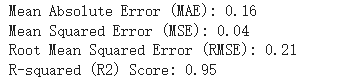
## Complicated Random Forest version is better than the easy version (without RSI and Volume Indicator).
## After introducing RSI (Relative Strength Index) and Volume as additional features, the overall regression performance improved. The main reasons are:
## 1. **Enhanced Market Sentiment Capture**
## RSI measures the degree of overbought or oversold conditions, capturing potential price reversals.

## Adding RSI allows the model to sense momentum changes beyond raw price movements, improving sensitivity to turning points.
## 2. **Incorporated Trading Activity Information**
## Volume indicates market participation and helps validate price trends.

## By including Volume, the model can distinguish between significant and insignificant price movements, enhancing trend reliability.
## 3. **Improved Model Robustness**
## Relying solely on price data can lead to overfitting small fluctuations.

## Adding diverse features like RSI and Volume provides complementary information, making the model more robust to noise.
## 4. **Better Short-Term Prediction Accuracy**
## Combining price history (lag, rolling_mean) with technical indicators (RSI, Volume) enables the model to capture short-term trends and reversals more precisely.
## Overall, introducing RSI and Volume improved the model’s ability to understand price dynamics, resulting in better predictive accuracy and robustness.

In [18]:
# Define 5 companies stock symbols
tickers = ['AAPL', 'GOOG', 'TSLA', 'MSFT', 'NVDA']

# Save data in a dictionary
data = {}

# Download 1-minute data for each stock for the last 7 days
for ticker in tickers:
    print(f"Downloading {ticker}")
    stock = yf.Ticker(ticker)
    hist = stock.history(period='5d', interval='1m')
    data[ticker] = hist
    # Save as separate CSV files
    hist.to_csv(f"{ticker}_last_5days_1min.csv")

print("Download completed and saved as CSV file!")

Download completed and saved as CSV file!


## NVDA

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ta.momentum import RSIIndicator
import plotly.graph_objs as go

# read the data
df = pd.read_csv("NVDA_last_5days.csv", index_col=0, parse_dates=True)
df = df.between_time("09:30", "16:00")

# split training set and testing set
last_date = df.index.date[-1]
train_df = df[df.index.date < last_date].copy()
test_df = df[df.index.date == last_date].copy()

# add features（lag, rolling, RSI）
def add_features(data):
    data['lag_1'] = data['Close'].shift(1)
    data['lag_5'] = data['Close'].shift(5)
    data['rolling_mean_5'] = data['Close'].rolling(5).mean()
    data['rolling_std_5'] = data['Close'].rolling(5).std()
    data['rsi_14'] = RSIIndicator(close=data['Close'], window=14).rsi()
    return data.dropna()

train_df = add_features(train_df)
test_df = add_features(test_df)

features = ['lag_1', 'lag_5', 'rolling_mean_5', 'rolling_std_5', 'rsi_14', 'Volume']
X_train = train_df[features]
y_train = train_df['Close']
X_test = test_df[features]
y_test = test_df['Close']
time_test = test_df.index  # for plotting

# random forest model
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Interactive charts
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_test, y=y_test, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=time_test, y=y_pred, mode='lines', name='Predicted Price (Random Forest)'))

fig.update_layout(
    title=f'NVDA 1-Minute Stock Price Prediction for {last_date} (Random Forest)',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()




In [9]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared (R2) Score: 0.97


In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ta.momentum import RSIIndicator

# read the data
df = pd.read_csv("NVDA_last_5days.csv", index_col=0, parse_dates=True)
df = df.between_time("09:30", "16:00")

# Split training and test sets
last_date = df.index.date[-1]
train_df = df[df.index.date < last_date].copy()
test_df = df[df.index.date == last_date].copy()

# Added hysteresis feature, rolling feature and RSI (using ta library)
def add_features(data):
    data['lag_1'] = data['Close'].shift(1)
    data['lag_5'] = data['Close'].shift(5)
    data['rolling_mean_5'] = data['Close'].rolling(5).mean()
    data['rolling_std_5'] = data['Close'].rolling(5).std()
    data['rsi_14'] = RSIIndicator(close=data['Close'], window=14).rsi()
    return data.dropna()

train_df = add_features(train_df)
test_df = add_features(test_df)

# set the features
features = ['lag_1', 'lag_5', 'rolling_mean_5', 'rolling_std_5', 'rsi_14', 'Volume']
X_train = train_df[features]
y_train = train_df['Close']
X_test = test_df[features]
y_test = test_df['Close']

# XGBoost model structure
model = XGBRegressor(
    n_estimators=30,
    max_depth=3,
    learning_rate=0.1,
    tree_method='hist',
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Use Plotly for interactive chart presentation
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_test, y=y_test, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=time_test, y=y_pred, mode='lines', name='Predicted Price (XGBoost)'))

fig.update_layout(
    title=f'NVDA 1-Minute Stock Price Prediction for {last_date} (XGBoost)',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

# show interactive chart
fig.show()


In [12]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R2) Score: 0.95
